<font color='red'>
<br>Content:
    
* [Introduction](#1)
    * [What are CNN ?](#2)
    * [Layers used to build ConvNets](#3)
* [Convolutional Neural Network](#4)
    * [Loading Dataset](#5)
    * [Reshape and Concatenate](#6)
    * [Train Test Split](#7)
    * [Create CNN Model](#7)

<a id="1"></a> <br>
## Introduction
<a id="2"></a> <br>
## What are CNN ?

Convolutional Neural Networks are very similar to ordinary Neural Networks from the previous chapter: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply.

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.
<a id="3"></a> <br>
## Layers used to build ConvNets
As we described above, a simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture.

Example Architecture: Overview. We will go into more details below, but a simple ConvNet for CIFAR-10 classification could have the architecture [INPUT - CONV - RELU - POOL - FC]. In more detail:

- INPUT [32x32x3] will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.  
- CONV layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as [32x32x12] if we decided to use 12 filters.   
- RELU layer will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([32x32x12]).   
- POOL layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as [16x16x12].    
- FC (i.e. fully-connected) layer will compute the class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as among the 10 categories of CIFAR-10. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


<a id="4"></a> <br>
## Convolutional Neural Network
<a id="5"></a> <br>
## Loading Dataset

(2062, 64, 64)


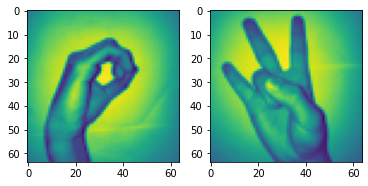

In [2]:
x = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
y = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")

print(x.shape)

img_size = 64  # Bu resimler 64x64 boyutlu olması için

plt.subplot(1, 2, 1)
plt.imshow(x[260].reshape(img_size, img_size))
plt.subplot(1, 2, 2)
plt.imshow(x[500].reshape(img_size, img_size))
plt.show()

<a id="6"></a> <br>
## Reshape and Concatenate

In [3]:
x = x.reshape(-1,64,64,1)

print("X Shape:",x.shape)
print("Y Shape:",y.shape)

number_of_classes = y.shape[1]

X Shape: (2062, 64, 64, 1)
Y Shape: (2062, 10)


In [4]:
list_y = []
list_y = [np.where(i == 1)[0][0] for i in y]
count = pd.Series(list_y).value_counts()
print(count)

5    208
9    207
3    207
6    207
7    206
8    206
4    206
2    206
1    205
0    204
dtype: int64


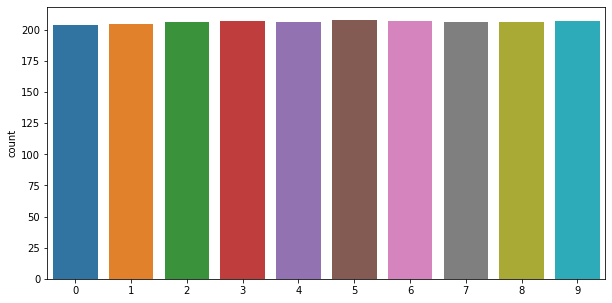

In [5]:
plt.figure(figsize = (10,5))
sns.countplot(np.array(list_y))
plt.show()

* -204-409 => 0
* -822-1028 => 1
* -1649-1855 => 2
* -1443-1649 => 3
* -1236-1443 => 4
* -1855-2062 => 5
* -615-822 => 6
* -409-615 => 7
* -1028-1236 => 8
* -0-204 => 9

In [6]:
X_organized = np.concatenate((x[204:409,:],
                              x[822:1028,:],
                              x[1649:1855,:],
                              x[1443:1649,:],
                              x[1236:1443,:],
                              x[1855:2062,:],
                              x[615:822,:],
                              x[409:615,:],
                              x[1028:1236,:],
                              x[0:204,:]),axis = 0)

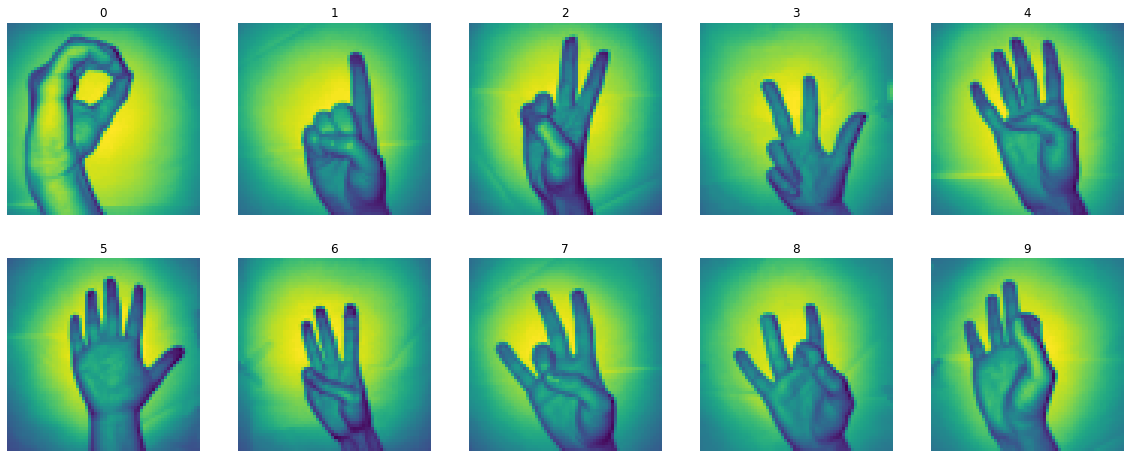

In [7]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    plt.imshow(X_organized[j].reshape(64,64))
    plt.title(np.argmax(y[j]))
    plt.axis('off')

<a id="7"></a> <br>
## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_organized,y,test_size = 0.2,random_state = 42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1649, 64, 64, 1)
x_test shape: (413, 64, 64, 1)
y_train shape: (1649, 10)
y_test shape: (413, 10)


<a id="8"></a> <br>
## Create CNN Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (9,9),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4), strides=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128 , kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

datagen = ImageDataGenerator(zoom_range = 0.5,rotation_range = 45)
datagen.fit(x_train)

history = model.fit(datagen.flow(x_train,y_train, batch_size=250),epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 138ms/step - loss: 2.3077 - accuracy: 0.1092 - val_loss: 2.3052 - val_accuracy: 0.0872
Epoch 2/100
7/7 [==============================] - 1s 94ms/step - loss: 2.3035 - accuracy: 0.0946 - val_loss: 2.3050 - val_accuracy: 0.0775
Epoch 3/100
7/7 [==============================] - 1s 93ms/step - loss: 2.3022 - accuracy: 0.1086 - val_loss: 2.3050 - val_accuracy: 0.0775
Epoch 4/100
7/7 [==============================] - 1s 93ms/step - loss: 2.3022 - accuracy: 0.0934 - val_loss: 2.3050 - val_accuracy: 0.0775
Epoch 5/100
7/7 [==============================] - 1s 92ms/step - loss: 2.3019 - accuracy: 0.1061 - val_loss: 2.3042 - val_accuracy: 0.0775
Epoch 6/100
7/7 [==============================] - 1s 94ms/step - loss: 2.3009 - accuracy: 0.1110 - val_loss: 2.3032 - val_accuracy: 0.0775
Epoch 7/100
7/7 [==============================] - 1s 94ms/step - loss: 2.2973 - accuracy: 0.1213 - val_loss: 2.2929 - val_accuracy: 0.1356
Epoch 8/100
7/7 [==

7/7 [==============================] - 1s 94ms/step - loss: 0.4632 - accuracy: 0.8490 - val_loss: 0.1081 - val_accuracy: 0.9758
Epoch 60/100
7/7 [==============================] - 1s 95ms/step - loss: 0.4736 - accuracy: 0.8466 - val_loss: 0.0998 - val_accuracy: 0.9782
Epoch 61/100
7/7 [==============================] - 2s 232ms/step - loss: 0.4606 - accuracy: 0.8575 - val_loss: 0.0931 - val_accuracy: 0.9831
Epoch 62/100
7/7 [==============================] - 1s 97ms/step - loss: 0.4778 - accuracy: 0.8520 - val_loss: 0.1149 - val_accuracy: 0.9685
Epoch 63/100
7/7 [==============================] - 1s 95ms/step - loss: 0.4468 - accuracy: 0.8478 - val_loss: 0.0914 - val_accuracy: 0.9758
Epoch 64/100
7/7 [==============================] - 1s 93ms/step - loss: 0.4709 - accuracy: 0.8490 - val_loss: 0.1051 - val_accuracy: 0.9709
Epoch 65/100
7/7 [==============================] - 1s 94ms/step - loss: 0.4682 - accuracy: 0.8454 - val_loss: 0.0789 - val_accuracy: 0.9758
Epoch 66/100
7/7 [=======

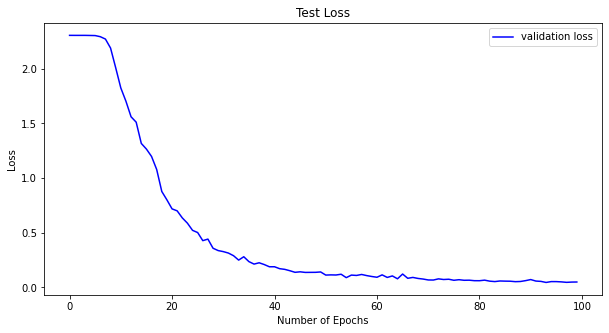

In [11]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

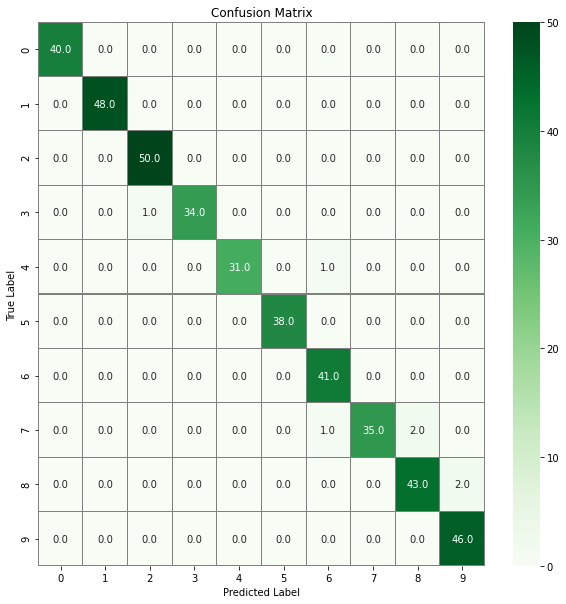

In [12]:
from sklearn.metrics import confusion_matrix


y_predict = model.predict(x_test)
y_predict_classes = np.argmax(y_predict,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_predict_classes) 
plt.figure(figsize = (10,10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()